

#Wild Animal

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install xmltodict

In [ ]:
import cv2 
import numpy as np
import matplotlib.pyplot as plt 
import xmltodict
import os 
import glob 
import pandas as pd 
import csv
from keras.optimizers import RMSprop

In [ ]:
images=[]
root='/content/drive/MyDrive/Animal_Intrusion/New Folder'
for img in glob.glob(root+'/*/*.jpg'):
  label,image_id=img.split('/')[-2],img.split('/')[-1].split('.')[0]
  xml=image_id+'.xml'
  image=image_id+'.jpg'
  xml_file=open(os.path.join(root,label,xml))
  data_dict = xmltodict.parse(xml_file.read())
  try:
    bbox=list(data_dict['annotation']['object']['bndbox'].values())
    size=list(data_dict['annotation']['size'].values())
    images.append({'image_id':image,'size':size,'bbox':bbox,'label':label})
  except Exception as e:
    pass

In [ ]:
len(images)

269

In [ ]:
images[0]

{'bbox': ['365', '80', '565', '322'],
 'image_id': 'Asian_Elephants_WW252891.jpg',
 'label': 'Elephant',
 'size': ['660', '495', '3']}

In [ ]:
# xml_file=open(os.path.join(root,images[0]['label'],images[0]['xml']))
# #print(xml_file)
# data_dict = xmltodict.parse(xml_file.read())
# data_dict['annotation']['object']['bndbox'].values()

In [ ]:
with open('animal.csv','w') as f:
  writer=csv.DictWriter(f,fieldnames=('image_id','size','bbox','label'))
  writer.writeheader()
  writer.writerows(images)

In [ ]:
train_df=pd.read_csv('animal.csv')
train_df.head()

,image_id,size,bbox,label
0,Asian_Elephants_WW252891.jpg,"['660', '495', '3']","['365', '80', '565', '322']",Elephant
1,uiCrUgVCf64TzEdTM8x9aD-1200-80.jpg,"['600', '400', '3']","['181', '26', '393', '251']",Elephant
2,WW187785.jpg,"['640', '480', '3']","['180', '15', '498', '328']",Elephant
3,wlds43_654640_2400.jpg,"['1272', '848', '3']","['517', '210', '937', '645']",Elephant
4,elephant.jpg,"['795', '525', '3']","['516', '190', '681', '397']",Elephant


In [ ]:
import ast  
train_df['bbox']=train_df['bbox'].apply(lambda x:ast.literal_eval(x))
train_df['size']=train_df['size'].apply(lambda x:ast.literal_eval(x))
train_df[['x0','y0','x1','y1']]=pd.DataFrame(train_df.bbox.tolist(),index=train_df.index)
train_df[['width','height','channel']]=pd.DataFrame(train_df['size'].tolist(),index=train_df.index)


In [ ]:
train_df.drop(columns=['bbox','size'], inplace=True)
train_df.head()

,image_id,label,x0,y0,x1,y1,width,height,channel
0,Asian_Elephants_WW252891.jpg,Elephant,365,80,565,322,660,495,3
1,uiCrUgVCf64TzEdTM8x9aD-1200-80.jpg,Elephant,181,26,393,251,600,400,3
2,WW187785.jpg,Elephant,180,15,498,328,640,480,3
3,wlds43_654640_2400.jpg,Elephant,517,210,937,645,1272,848,3
4,elephant.jpg,Elephant,516,190,681,397,795,525,3


In [ ]:
train_df['x0']=train_df['x0'].apply(lambda x:int(x))
train_df['x1']=train_df['x1'].apply(lambda x:int(x))
train_df['y0']=train_df['y0'].apply(lambda x:int(x))
train_df['y1']=train_df['y1'].apply(lambda x:int(x))

In [ ]:
x0=int(np.ceil(x0*(224/w)))
x1=int(np.ceil(x1*(224/w)))
y0=int(np.ceil(y0*(224/h)))
y1=int(np.ceil(y1*(224/h)))

NameError: ignored

In [ ]:
train_df.label.value_counts()

Bald eagle    26
Elephant      25
Giraffe       24
camel         24
Leopard       22
wolf          22
Cow           22
kangaroo      21
Monkey        21
Lion          21
Panda         15
Zebra         14
Deer          12
Name: label, dtype: int64

In [ ]:
from sklearn.utils import resample
# Separate majority and minority classes
df_c6 = train_df[train_df['label']== 'Bald eagle']
df_c7 = train_df[train_df['label']== 'Elephant']
df_c8 = train_df[train_df['label']== 'camel']
df_c9 = train_df[train_df['label']== 'Giraffe']
df_c10 = train_df[train_df['label']== 'Leopard']
df_c11 = train_df[train_df['label']== 'wolf']
df_c12 = train_df[train_df['label']== 'Cow']
df_c13= train_df[train_df['label']== 'Lion']
df_c14= train_df[train_df['label']== 'Monkey']
df_c15= train_df[train_df['label']== 'kangaroo']
df_c16 = train_df[train_df['label']== 'Panda']
df_c17 = train_df[train_df['label']== 'Zebra']
df_c18 = train_df[train_df['label']== 'Deer']

df1_upsample = resample(df_c6,  replace=True, n_samples=500, random_state=143)
df2_upsample = resample(df_c7,  replace=True, n_samples=500, random_state=143)
df3_upsample = resample(df_c8,  replace=True, n_samples=500, random_state=143)
df4_upsample = resample(df_c9,  replace=True, n_samples=500, random_state=143)
df5_upsample = resample(df_c10,  replace=True, n_samples=500, random_state=143)
df6_upsample = resample(df_c11,  replace=True, n_samples=500, random_state=143)
df7_upsample = resample(df_c12,  replace=True, n_samples=500, random_state=143)
df8_upsample = resample(df_c13,  replace=True, n_samples=500, random_state=143)
df9_upsample = resample(df_c14,  replace=True, n_samples=500, random_state=143)
df10_upsample = resample(df_c15,  replace=True, n_samples=500, random_state=143)
df11_upsample = resample(df_c16,  replace=True, n_samples=500, random_state=143)
df12_upsample = resample(df_c17,  replace=True, n_samples=500, random_state=143)
df13_upsample = resample(df_c18,  replace=True, n_samples=500, random_state=143)


# Combine minority class with downsampled majority class
df_upsampled = pd.concat([df1_upsample,df2_upsample,df3_upsample,df4_upsample,df5_upsample,df6_upsample,df7_upsample,df8_upsample,df9_upsample,df10_upsample, df11_upsample,df12_upsample,df13_upsample])

# Display new class counts
df_upsampled['label'].value_counts()

kangaroo      500
Monkey        500
Deer          500
wolf          500
Zebra         500
camel         500
Cow           500
Leopard       500
Elephant      500
Lion          500
Giraffe       500
Panda         500
Bald eagle    500
Name: label, dtype: int64

In [ ]:
train_df = df_upsampled.sample(frac=1)

In [ ]:
from sklearn.preprocessing import LabelBinarizer
le = LabelBinarizer()
y = le.fit_transform(train_df['label'])

In [ ]:
le.classes_

array(['Bald eagle', 'Cow', 'Deer', 'Elephant', 'Giraffe', 'Leopard',
       'Lion', 'Monkey', 'Panda', 'Zebra', 'camel', 'kangaroo', 'wolf'],
      dtype='<U10')

/content/drive/MyDrive/Animal_Intrusion/New Folder/Elephant/zoomthebabye.jpg


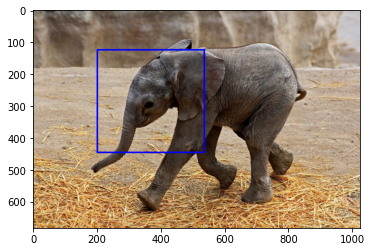

In [ ]:
for i,row in train_df.iterrows():
  k = os.path.join(root,row['label'],row['image_id'])
  print(k)
  img=cv2.imread(os.path.join(root,row['label'],row['image_id']))
  img_rgb=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
  x0=int(row['x0'])
  y0=int(row['y0'])
  x1=int(row['x1'])
  y1=int(row['y1'])
  img_bbox=cv2.rectangle(img_rgb, (x0,y0), (x1, y1), (0, 0, 255), 4)
  plt.imshow(img_bbox)
  plt.show()
  break

(224, 224, 3)
44
41
118
147


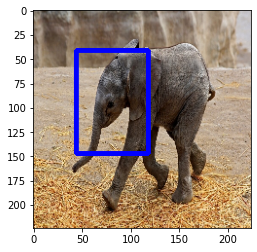

In [ ]:
for i,row in train_df.iterrows():
  img=cv2.imread(os.path.join(root,row['label'],row['image_id']))
  img_rgb=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
  #img_rgb_resize = img_rgb.resize(224,224)
  img_rgb = cv2.resize(img_rgb, (224, 224))
  print(img_rgb.shape)
  #print(row['x0'])
  x0 = int(np.ceil(int(row['x0'])*(224/int(row['width']))))
  print(x0)
  y0 = int(np.ceil(int(row['y0'])*(224/int(row['height']))))
  print(y0)
  x1 = int(np.ceil(int(row['x1'])*(224/int(row['width']))))
  print(x1)
  y1 = int(np.ceil(int(row['y1'])*(224/int(row['height']))))
  print(y1)
  #y0=int(row['y0'])
  #x1=int(row['x1'])
  #y1=int(row['y1'])
  img_bbox=cv2.rectangle(img_rgb, (x0,y0), (x1, y1), (0, 0, 255), 4)
  plt.imshow(img_bbox)
  plt.show()
  break

In [ ]:
x_0 = []
x_1 = []
y_0 = []
y_1 = []
for i,row in train_df.iterrows():
  #img=cv2.imread(os.path.join(root,row['label'],row['image_id']))
  #img_rgb=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
  #img_rgb_resize = img_rgb.resize(224,224)
  #img_rgb = cv2.resize(img_rgb, (224, 224))
 
  x0 = int(np.ceil(int(row['x0'])*(224/int(row['width']))))

  y0 = int(np.ceil(int(row['y0'])*(224/int(row['height']))))
 
  x1 = int(np.ceil(int(row['x1'])*(224/int(row['width']))))
 
  y1 = int(np.ceil(int(row['y1'])*(224/int(row['height']))))
  x_0.append(x0), x_1.append(x0), y_0.append(x0), y_1.append(x0)

In [ ]:
boundsing_box = pd.DataFrame({'x0' : x_0,
                                'y0' : y_0,
                                'x1' : x_1,
                                'y1' : y_1}, 
                                columns=['x0','y0', 'x1','y1'])

In [ ]:
bbx = np.array(boundsing_box)

In [ ]:
from sklearn.preprocessing import LabelBinarizer
le = LabelBinarizer()

In [ ]:
class_label = le.fit_transform(train_df['label'])

In [ ]:
X =  []
for i,row in train_df.iterrows():
  img=cv2.imread(os.path.join(root,row['label'],row['image_id']))
  img_rgb=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
  img_rgb = cv2.resize(img_rgb, (224, 224))
  #print(img_rgb.shape)
  #x0=int(row['x0'])
  #y0=int(row['y0'])
  #x1=int(row['x1'])
  #y1=int(row['y1'])
  #img_bbox=cv2.rectangle(img_rgb, (x0,y0), (x1, y1), (0, 0, 255), 4)
  #
  #plt.imshow(img_bbox)
  #plt.show()
  img_bgr = np.array(img_rgb)
  X.append(img_bgr)
  #break

In [ ]:
len(X)

6500

In [ ]:
import os

import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from PIL import Image
import random
from sklearn.model_selection import KFold, cross_val_score, train_test_split

In [ ]:
import json
import pandas as pd
import urllib
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import cv2
import pickle
import random
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.mobilenet import MobileNet
from tensorflow.keras.models import Sequential,Model,load_model
from tensorflow.keras.layers import Dense, Dropout, Flatten,Softmax,Dropout,BatchNormalization,MaxPooling2D,Input,Conv2D
from keras.utils.np_utils  import to_categorical
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing import image
from tensorflow.keras import regularizers 
from sklearn.preprocessing import LabelEncoder
from tqdm.notebook import tqdm
import glob
import os
import re
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import ModelCheckpoint

In [ ]:
data=list(zip(X,bbx,class_label))
random.seed(0)
random.shuffle(data)
x,y_box,y_class=zip(*data)

In [ ]:
x_train,x_test,y_class_train,y_class_test,y_box_train,y_box_test=train_test_split(np.array(x),
                                                                                  np.array(y_class),
                                                                                  np.array(y_box),
                                                                        test_size=0.2,random_state=42)
x_train.shape,x_test.shape

((5200, 224, 224, 3), (1300, 224, 224, 3))

In [ ]:
vgg=VGG16(weights="imagenet", include_top=False, input_shape=(224, 224,3))
vgg.trainable=False

In [ ]:
vgg=VGG16(weights="imagenet", include_top=False, input_shape=(224, 224, 3))
vgg.trainable=False
model = Sequential()
model.add(vgg)
model.add(Flatten())
model.add(Dense(128, activation="relu"))
model.add(Dense(64, activation="relu"))
model.add(Dense(64, activation="relu"))
model.add(Dense(4,activation='linear'))
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 7, 7, 512)         14714688  
_________________________________________________________________
flatten_8 (Flatten)          (None, 25088)             0         
_________________________________________________________________
dense_23 (Dense)             (None, 128)               3211392   
_________________________________________________________________
dense_24 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_25 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_26 (Dense)             (None, 4)                 260       
Total params: 17,938,756
Trainable params: 3,224,068
Non-trainable params: 14,714,688
__________________________________

In [ ]:
model.compile(optimizer='adam', loss='mse')
#filepath="weights-improvement-number_plate_detection_final-{epoch:02d}-{val_loss:.2f}.hdf5"
#checkpoint = ModelCheckpoint(filepath, monitor='val_loss', verbose=1, save_best_only=True, mode='min')
#callbacks_list = [checkpoint]

hist = model.fit(x_train,y_box_train,validation_data=(x_test,y_box_test),
          epochs=5,verbose=1)

Epoch 1/5
163/163 [==============================] - 1807s 11s/step - loss: 980.0249 - val_loss: 5.5800
Epoch 2/5
163/163 [==============================] - 1797s 11s/step - loss: 5.5728 - val_loss: 9.0204
Epoch 3/5
163/163 [==============================] - 1792s 11s/step - loss: 13.2818 - val_loss: 12.4934
Epoch 4/5
163/163 [==============================] - 1793s 11s/step - loss: 20.5449 - val_loss: 35.0926
Epoch 5/5
163/163 [==============================] - 1788s 11s/step - loss: 23.2312 - val_loss: 8.3910


In [ ]:
import tensorflow as tf

In [ ]:
#File path
file_name = '/content/drive/MyDrive/Animal_Intrusion/wild_bb.h5'
#Save the model
tf.keras.models.save_model(model,file_name)

(1, 224, 224, 3)
[[51.20367 51.84002 49.15899 50.49335]]


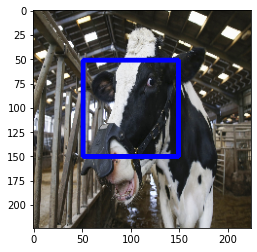

In [ ]:
# bounding box testing

img=cv2.imread('/content/drive/MyDrive/Animal_Intrusion/New Folder/Cow/-1x-1.jpg')
img_rgb=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
#img_rgb_resize = img_rgb.resize(224,224)
img_rgb = cv2.resize(img_rgb, (224, 224))
img  = np.expand_dims(img_rgb, axis = 0)
print(img.shape)
#print(row['x0'])
#x0 = int(np.ceil(int(row['x0'])*(224/int(row['width']))))
#print(x0)
#y0 = int(np.ceil(int(row['y0'])*(224/int(row['height']))))
#print(y0)
#x1 = int(np.ceil(int(row['x1'])*(224/int(row['width']))))
#print(x1)
#y1 = int(np.ceil(int(row['y1'])*(224/int(row['height']))))
#print(y1)
#y0=int(row['y0'])
#x1=int(row['x1'])
#y1=int(row['y1'])
x = model.predict(img)
print(x)
x0 = int(x[0][0])
y0 = int(x[0][1])
x1 = int(x[0][2]+100)
y1 = int(x[0][3]+100)

img_bbox=cv2.rectangle(img_rgb, (x0,y0), (x1, y1), (0, 0, 255), 4)
plt.imshow(img_bbox)
plt.show()


In [ ]:
len(le.classes_)

13

In [ ]:
x = np.array(X)

In [ ]:
x = np.expand_dims(x[1], axis=0)

In [ ]:
x.shape

(1, 224, 224, 3)

In [ ]:
# import the vgg16 model
from keras.applications.vgg16 import VGG16

In [ ]:
vgg=VGG16(weights='imagenet',include_top=False,input_shape=(224,224,3))
vgg.trainable=False

In [ ]:
# Set the vgg16 model

model_1=Sequential()
model_1.add(vgg)
model_1.add(Flatten())
model_1.add(Dense(128, activation='relu'))
model_1.add(Dropout(0.2))
model_1.add(Dense(13, activation='softmax'))

In [ ]:
#Compile the model
opt = Adam(lr=0.001)

optimizer = RMSprop(lr=0.001, rho=0.9, epsilon=1e-08, decay=0.0)
model_1.compile(optimizer = optimizer, loss = "categorical_crossentropy", metrics = ["accuracy"])

In [ ]:
#from keras.callbacks import ModelCheckpoint
#filepath="/content/drive/MyDrive/Leather/Leather_weights-improvement_vgg16-{epoch:02d}-{val_accuracy:.2f}.hdf5"
#heckpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
#callbacks_list = [checkpoint]

In [ ]:
#Fit the data or train the model
History_1 = model_1.fit(x_train,y_class_train, epochs = 30, validation_data = (x_test,y_class_test),batch_size = 128)

Epoch 1/30
2/2 [==============================] - 78s 40s/step - loss: 100.8551 - accuracy: 0.0652 - val_loss: 312.0388 - val_accuracy: 0.0556
Epoch 2/30
2/2 [==============================] - 75s 40s/step - loss: 244.3808 - accuracy: 0.2035 - val_loss: 34.7079 - val_accuracy: 0.5741
Epoch 3/30
2/2 [==============================] - 75s 40s/step - loss: 37.9787 - accuracy: 0.6454 - val_loss: 12.5707 - val_accuracy: 0.7037
Epoch 4/30
2/2 [==============================] - 75s 40s/step - loss: 5.1801 - accuracy: 0.8907 - val_loss: 7.9880 - val_accuracy: 0.7407
Epoch 5/30
2/2 [==============================] - 76s 40s/step - loss: 0.6777 - accuracy: 0.9617 - val_loss: 10.0399 - val_accuracy: 0.6852
Epoch 6/30
2/2 [==============================] - 75s 40s/step - loss: 0.8690 - accuracy: 0.9705 - val_loss: 12.7142 - val_accuracy: 0.7037
Epoch 7/30
2/2 [==============================] - 75s 40s/step - loss: 0.4716 - accuracy: 0.9684 - val_loss: 12.6574 - val_accuracy: 0.7037
Epoch 8/30
2/2 

In [ ]:
#File path
file_name ='/content/drive/MyDrive/Animal_Intrusion/wild_cls.h5'

#Save the model
tf.keras.models.save_model(model_1,file_name)

In [ ]:
import tensorflow as tf
model_bbx = tf.keras.models.load_model('/content/drive/MyDrive/Animal_Intrusion/wild_bb.h5')
model_cls = tf.keras.models.load_model('/content/drive/MyDrive/Animal_Intrusion/wild_cls.h5')

In [ ]:
lists = le.classes_

(1, 224, 224, 3)


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Class :-  Cow


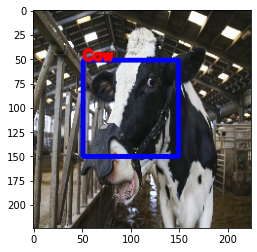

In [ ]:
# bounding box testing

img=cv2.imread('/content/drive/MyDrive/Animal_Intrusion/New Folder/Cow/-1x-1.jpg')
img_rgb=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
#img_rgb_resize = img_rgb.resize(224,224)
img_rgb = cv2.resize(img_rgb, (224, 224))
img  = np.expand_dims(img_rgb, axis = 0)
print(img.shape)
#print(row['x0'])
#x0 = int(np.ceil(int(row['x0'])*(224/int(row['width']))))
#print(x0)
#y0 = int(np.ceil(int(row['y0'])*(224/int(row['height']))))
#print(y0)
#x1 = int(np.ceil(int(row['x1'])*(224/int(row['width']))))
#print(x1)
#y1 = int(np.ceil(int(row['y1'])*(224/int(row['height']))))
#print(y1)
#y0=int(row['y0'])
#x1=int(row['x1'])
#y1=int(row['y1'])
class_label = le.classes_
x = model_bbx.predict(img)
y = model_cls.predict_classes(img)
#print(x)
print("Class :- ",class_label[y[0]])
x0 = int(x[0][0])
y0 = int(x[0][1])
x1 = int(x[0][2]+100)
y1 = int(x[0][3]+100)

img_bbox=cv2.rectangle(img_rgb, (x0,y0), (x1, y1), (0, 0, 255), 4)
font = cv2.FONT_HERSHEY_SIMPLEX
image = cv2.putText(img_bbox, class_label[y[0]], (y0, y0), font,  0.5, (255, 0, 0), 2, cv2.LINE_AA)

plt.imshow(img_bbox)
plt.show()

(1, 224, 224, 3)


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Class :-  Elephant


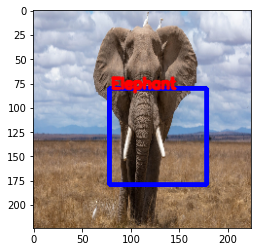

In [28]:
# bounding box testing

img=cv2.imread('/content/drive/MyDrive/Animal_Intrusion/New Folder/Elephant/Getty121719.jpg')
img_rgb=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
#img_rgb_resize = img_rgb.resize(224,224)
img_rgb = cv2.resize(img_rgb, (224, 224))
img  = np.expand_dims(img_rgb, axis = 0)
print(img.shape)
#print(row['x0'])
#x0 = int(np.ceil(int(row['x0'])*(224/int(row['width']))))
#print(x0)
#y0 = int(np.ceil(int(row['y0'])*(224/int(row['height']))))
#print(y0)
#x1 = int(np.ceil(int(row['x1'])*(224/int(row['width']))))
#print(x1)
#y1 = int(np.ceil(int(row['y1'])*(224/int(row['height']))))
#print(y1)
#y0=int(row['y0'])
#x1=int(row['x1'])
#y1=int(row['y1'])
class_label = le.classes_
x = model_bbx.predict(img)
y = model_cls.predict_classes(img)
#print(x)
print("Class :- ",class_label[y[0]])
x0 = int(x[0][0])
y0 = int(x[0][1])
x1 = int(x[0][2]+100)
y1 = int(x[0][3]+100)

img_bbox=cv2.rectangle(img_rgb, (x0,y0), (x1, y1), (0, 0, 255), 4)
font = cv2.FONT_HERSHEY_SIMPLEX
image = cv2.putText(img_bbox, class_label[y[0]], (y0, y0), font,  0.5, (255, 0, 0), 2, cv2.LINE_AA)

plt.imshow(img_bbox)
plt.show()

(1, 224, 224, 3)


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Class :-  Zebra


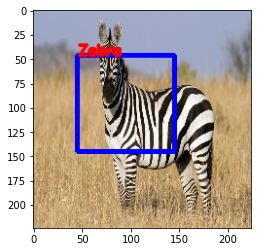

In [30]:
# bounding box testing

img=cv2.imread('/content/drive/MyDrive/Animal_Intrusion/New Folder/Zebra/HjFE8NKWuCmgfHCcndJ3rK.jpg')
img_rgb=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
#img_rgb_resize = img_rgb.resize(224,224)
img_rgb = cv2.resize(img_rgb, (224, 224))
img  = np.expand_dims(img_rgb, axis = 0)
print(img.shape)
#print(row['x0'])
#x0 = int(np.ceil(int(row['x0'])*(224/int(row['width']))))
#print(x0)
#y0 = int(np.ceil(int(row['y0'])*(224/int(row['height']))))
#print(y0)
#x1 = int(np.ceil(int(row['x1'])*(224/int(row['width']))))
#print(x1)
#y1 = int(np.ceil(int(row['y1'])*(224/int(row['height']))))
#print(y1)
#y0=int(row['y0'])
#x1=int(row['x1'])
#y1=int(row['y1'])
class_label = le.classes_
x = model_bbx.predict(img)
y = model_cls.predict_classes(img)
#print(x)
print("Class :- ",class_label[y[0]])
x0 = int(x[0][0])
y0 = int(x[0][1])
x1 = int(x[0][2]+100)
y1 = int(x[0][3]+100)

img_bbox=cv2.rectangle(img_rgb, (x0,y0), (x1, y1), (0, 0, 255), 4)
font = cv2.FONT_HERSHEY_SIMPLEX
image = cv2.putText(img_bbox, class_label[y[0]], (y0, y0), font,  0.5, (255, 0, 0), 2, cv2.LINE_AA)

plt.imshow(img_bbox)
plt.show()